
# CT421 Project 1  Evolutionary Search - GAs

**Aoife Mulligan 20307646 | Leo Chui 20343266**  



# Part A


In [7]:
import matplotlib.pyplot as plt
import random

# Define global variables for string size, population size, and mutation rate

STRING_SIZE = 30
POPULATION_SIZE = 100
MUTATION_RATE = 1/float(STRING_SIZE)
CROSSOVER_RATE = 0.9
NUM_GENERATIONS = 1000
ELITE_FACTOR = 1/10

In [8]:

# One Max population function

# returns a string of 0s and 1s of length size

def binary_string_generator(size):
    return ''.join(str(random.randrange(2)) for _ in range(size))


### 1.1 OneMax Problem


In [9]:

# One Max fitness function

# fitness is based on the number of 1's in the bitstring
# fitness = count of 1 in bitstring

def one_max_fitness(bitstring):
    return -bitstring.count('1')


### 1.2 Target String


In [10]:
# Target string fitness function

# bitstring that we want to evolve to
# is a string of 25 1's in a row
# and 5 0's appended to the end

target_string = '1' * 25 + '0' * 5
print(target_string)

# fitness is based on the matching of the bitstring to the target string
# fitness is negated at the end

def target_string_fitness(bitstring):
    score = 0
    for i in range(len(bitstring)):
        if bitstring[i] == target_string[i]:
            score += 1
    return -score

111111111111111111111111100000



### 1.3 Deceptive Landscape


In [11]:

# Deceptive fitness function

# global optima solution is a string of all 0's
# but fitness function rewards occurrence of 1's

def deceptive_fitness(bitstring):
    score = 0
    if '1' in bitstring: # if bitstring contains 1's
        for i in range(len(bitstring)): 
            if bitstring[i] == '1':
                score += 1 # increment score for each 1 in the bitstring
    else:
        score = 2*len(bitstring) # if there are no 1's, the score is 2*length of bitstring
    return -score # negate score to maintain consistency with other fitness functions



### 2 Bin-packing


In [12]:

# Bin-packing Fitness

# def bin_packing_fitness()


---



#### Reusable Code


In [13]:

# Tournament selection function

# selects k individuals from the population at random
# returns the index of the best individual

def tournament_selection(population, scores, k=3):
    # Select k individuals from population at random
    selection_i = random.randrange(len(population))
    for i in [random.randrange(len(population)) for _ in range(k-1)]:
        # Check if better (e.g. perform a tournament)
        if scores[i] < scores[selection_i]:
            selection_i = i
    # Return the index of the best
    return population[selection_i]

In [14]:

# Crossover function

# performs crossover between two parents

def crossover(parent1, parent2, crossover_rate=CROSSOVER_RATE):
    # if random.random() >= crossover_rate:
    #     take parent1 char i
    # else:
    #     take parent2 char i

    child1 = ''.join([parent1[i] if random.random(
    ) < crossover_rate else parent2[i] for i in range(len(parent1))])
    child2 = ''.join([parent2[i] if random.random(
    ) < crossover_rate else parent1[i] for i in range(len(parent2))])

    return child1, child2

In [15]:

# Mutation function

# performs mutation on a bitstring

def mutation(bitstring, mutate_rate=MUTATION_RATE):
    for i in range(len(bitstring)):
        # check for mutation
        if random.random() < mutate_rate:
            # flips i
            bitstring = bitstring[:i] + str(1 - int(bitstring[i])) + bitstring[i+1:]

In [16]:

# Elitism selection function

def elite_select(population, scores, elite_factor=ELITE_FACTOR):
    elite_size = int(len(population) * elite_factor)
    # Sort the population based on scores in ascending order
    sorted_population = [x for _, x in sorted(zip(scores, population))]

    # Select the elite individuals
    elite = sorted_population[:elite_size]

    # Return the elite individuals
    return elite

---


#### Algorithm


In [20]:

# Generic GA algorithm that is passed different fitness functions

def algorithm(fitness, generate_population, size, generations, pop_size, cross_rate, mutate_rate, elite_factor):

    # define average fitness list to plot
    avg_fitness = []

    # initial random population
    population = [generate_population(size) for _ in range(pop_size)]
    # debug - print size of population
    print("Population size: %d" % len(population))
    # debug - print length of first individual
    print("Individual length: %d" % len(population[0]))

    # Store temp best solution
    best_solution, best_fitness = 0, fitness(population[0])

    # Loop generations
    for gen in range(generations):
        # Evaluate all individuals in population
        scores = [fitness(c) for c in population]
        # calculate average fitness of generation
        avg_fitness.append(sum(scores) / pop_size)
        
        # print best score every 100 generations
        if gen % 100 == 0:
            print("Generation %d, best score = %.3f, average fitness = %.3f" % (gen, min(scores), avg_fitness[gen]))

        # Check for new best solution
        for i in range(pop_size):
            if scores[i] < best_fitness:
                best_solution, best_fitness = population[i], scores[i]
                print("Generation %d, new best f(%s) = %.3f" %
                      (gen, population[i], scores[i]))

        # Select parents to crossover
        parents = [tournament_selection(population, scores)
                   for _ in range(pop_size)]
        # Create next generation
        children = list()
        children.extend(elite_select(population, scores, elite_factor))

        for i in range(0, pop_size, 2):
            # Get pair of parents
            parent1, parent2 = parents[i], parents[i+1]
            # Perform crossover
            for child in crossover(parent1, parent2, cross_rate):
                # Mutate child
                mutation(child, mutate_rate)
                # Add to next generation
                children.append(child)
        # Replace population
        population = children

    # plot average fitness over generations
    plt.plot(avg_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.show()
    
    return [best_solution, best_fitness]

One Max Problem
Running algorithm...
Population size: 100
Individual length: 30
Generation 0, best score = -22.000, average fitness = -14.930
Generation 0, new best f(101010110001001110111111011110) = -19.000
Generation 0, new best f(101011011011101001011111111011) = -21.000
Generation 0, new best f(101111001111111111010101001111) = -22.000
Generation 1, new best f(101111001111111111010101011111) = -23.000
Generation 3, new best f(101111101110101101111111111011) = -24.000
Generation 4, new best f(101111101111101111111111111101) = -26.000
Generation 5, new best f(101111111111101111111111111011) = -27.000
Generation 6, new best f(111111111111101111111111111111) = -29.000
Generation 7, new best f(111111111111111111111111111111) = -30.000
Generation 100, best score = -30.000, average fitness = -33.300
Generation 200, best score = -30.000, average fitness = -33.300
Generation 300, best score = -30.000, average fitness = -33.300
Generation 400, best score = -30.000, average fitness = -33.300

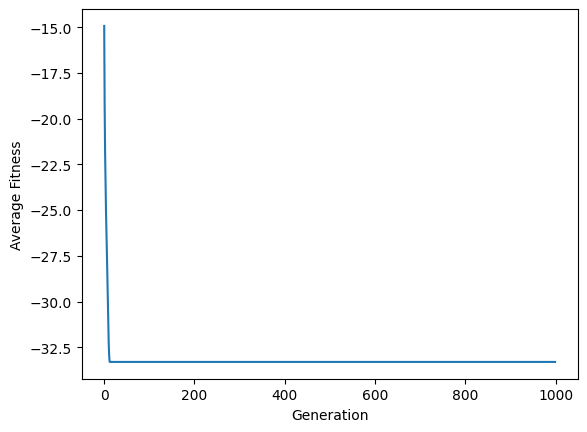


Best Solution for One-max: 111111111111111111111111111111 = -30.00000

Target String Problem
Running algorithm...
Population size: 100
Individual length: 30
Generation 0, best score = -22.000, average fitness = -15.240
Generation 0, new best f(000101110101101111010100001010) = -16.000
Generation 0, new best f(011110110011110111000111101100) = -20.000
Generation 0, new best f(110111110100101111111111000111) = -21.000
Generation 0, new best f(111111111111010110100110110100) = -22.000
Generation 1, new best f(110111111110101111111111100101) = -25.000
Generation 2, new best f(110111111111101111111111100101) = -26.000
Generation 5, new best f(110111111111101111111111100001) = -27.000
Generation 6, new best f(111111111111101111111111100001) = -28.000
Generation 8, new best f(111111111111101111111111100000) = -29.000
Generation 10, new best f(111111111111111111111111100000) = -30.000
Generation 100, best score = -30.000, average fitness = -33.300
Generation 200, best score = -30.000, average

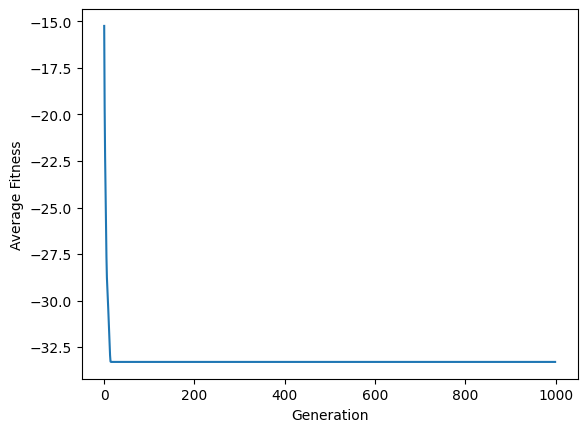


Best Solution for Target String: 111111111111111111111111100000 = -30.00000

Deceptive Problem
Running algorithm...
Population size: 100
Individual length: 30
Generation 0, best score = -23.000, average fitness = -14.980
Generation 0, new best f(110010010000111001001111110001) = -15.000
Generation 0, new best f(111010111110010010010101000110) = -16.000
Generation 0, new best f(110010111111001010110111100000) = -17.000
Generation 0, new best f(101111101100110001111000001111) = -18.000
Generation 0, new best f(110010011110011111111100110001) = -19.000
Generation 0, new best f(110011001111111110110111011111) = -23.000
Generation 3, new best f(110011001111111111111111011011) = -24.000
Generation 4, new best f(011111111111111101110111010111) = -25.000
Generation 6, new best f(111111001111111111101111110111) = -26.000
Generation 6, new best f(011111111111111111110111011111) = -27.000
Generation 7, new best f(111111111111111111110111011111) = -28.000
Generation 10, new best f(111111111111111

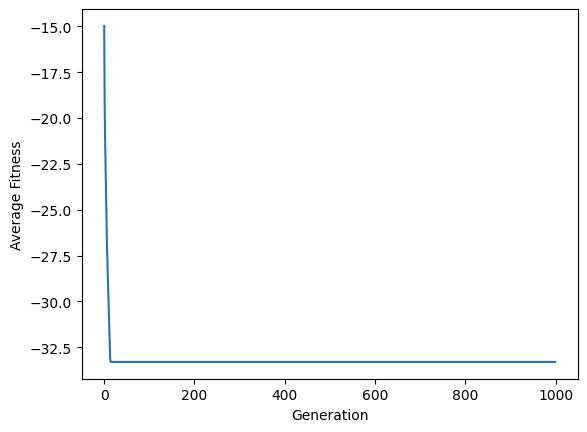


Best Solution for Deceptive: 111111111111111111111111111111 = -30.00000

Completed operations


In [21]:

# Running algorithm with different fitness functions

if __name__ == '__main__':
    
    print("One Max Problem")
    print("Running algorithm...")
    solution, score = algorithm(
        one_max_fitness, binary_string_generator, STRING_SIZE, NUM_GENERATIONS, POPULATION_SIZE, CROSSOVER_RATE, MUTATION_RATE, ELITE_FACTOR)
    print('\nBest Solution for One-max: %s = %.5f' % 
          (solution, score) + "\n")
    
    print("Target String Problem")
    print("Running algorithm...")
    solution, score = algorithm(
        target_string_fitness, binary_string_generator, STRING_SIZE, NUM_GENERATIONS, POPULATION_SIZE, CROSSOVER_RATE, MUTATION_RATE, ELITE_FACTOR)
    print('\nBest Solution for Target String: %s = %.5f' %
          (solution, score) + "\n")
    
    print("Deceptive Problem")
    print("Running algorithm...")
    solution, score = algorithm(
        deceptive_fitness, binary_string_generator, STRING_SIZE, NUM_GENERATIONS, POPULATION_SIZE, CROSSOVER_RATE, MUTATION_RATE, ELITE_FACTOR)
    print('\nBest Solution for Deceptive: %s = %.5f' %
          (solution, score) + "\n")
    
    
    print("Completed operations")